# Teste Prático

Com base no módulo que acabamos de ver, junte suas anotações e conhecimento adquirido para analisar a seguinte base de dados:

[netflix daily top 10.csv](https://prod-files-secure.s3.us-west-2.amazonaws.com/08f749ff-d06d-49a8-a488-9846e081b224/2dc4ff7c-99f5-4b66-84ba-5c8714c90623/netflix_daily_top_10.csv)

Dessa base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

## Solução

In [1337]:
import pandas as pd

## Tipos de dados disponíveis

In [1338]:
df_netflix = pd.read_csv('../datasets/netflix daily top 10.csv')

In [1339]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [1340]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000000000000,7100.000000000000000,7100.000000000000000
mean,5.500000000000000,24.123661971830987,122.790140845070425
std,2.872483617971048,58.473789251347533,213.861642160496018
min,1.000000000000000,1.000000000000000,1.000000000000000
25%,3.000000000000000,3.000000000000000,19.000000000000000
50%,5.500000000000000,7.000000000000000,50.000000000000000
75%,8.000000000000000,18.000000000000000,128.000000000000000
max,10.000000000000000,428.000000000000000,1474.000000000000000


In [1341]:
df_netflix.shape

(7100, 10)

In [1342]:
df_netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [1343]:
df_netflix.tail()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


## Tamanho da base de dados

In [1344]:
len(df_netflix), len(df_netflix[df_netflix.isna().any(axis=1)])

(7100, 2501)

In [1345]:
df_netflix.columns = ['as_of', 'ranked', 'year_rank', 'week_rank', 'title', 'type', 'exclusive', 'release_date', 'days_top_10', 'score']

In [1346]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   as_of         7100 non-null   object
 1   ranked        7100 non-null   int64 
 2   year_rank     7100 non-null   object
 3   week_rank     7100 non-null   object
 4   title         7100 non-null   object
 5   type          7100 non-null   object
 6   exclusive     4599 non-null   object
 7   release_date  7100 non-null   object
 8   days_top_10   7100 non-null   int64 
 9   score         7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## Convertendo dados

Os valores para as colunas `as_of` e `release_date` são do tipo `datetime`, mas estão sendo consideradas como `object`.

In [1347]:
df_netflix.describe()

,ranked,days_top_10,score
count,7100.000000000000000,7100.000000000000000,7100.000000000000000
mean,5.500000000000000,24.123661971830987,122.790140845070425
std,2.872483617971048,58.473789251347533,213.861642160496018
min,1.000000000000000,1.000000000000000,1.000000000000000
25%,3.000000000000000,3.000000000000000,19.000000000000000
50%,5.500000000000000,7.000000000000000,50.000000000000000
75%,8.000000000000000,18.000000000000000,128.000000000000000
max,10.000000000000000,428.000000000000000,1474.000000000000000


In [1348]:
df_netflix.as_of.head(5)

0    2020-04-01
1    2020-04-01
2    2020-04-01
3    2020-04-01
4    2020-04-01
Name: as_of, dtype: object

In [1349]:
df_netflix.as_of = pd.to_datetime(df_netflix.as_of)
df_netflix.as_of.head(5)

0   2020-04-01
1   2020-04-01
2   2020-04-01
3   2020-04-01
4   2020-04-01
Name: as_of, dtype: datetime64[ns]

In [1350]:
df_netflix.release_date.head(5)

0    Mar 20, 2020
1    Jul 21, 2017
2    Mar 28, 2019
3    Mar 26, 2020
4    Mar 20, 2020
Name: release_date, dtype: object

In [1351]:
df_netflix.release_date = pd.to_datetime(df_netflix.release_date)
df_netflix.release_date.head(5)

0   2020-03-20
1   2017-07-21
2   2019-03-28
3   2020-03-26
4   2020-03-20
Name: release_date, dtype: datetime64[ns]

In [1352]:
df_netflix.type.unique()

array(['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
      dtype=object)

In [1353]:
import numpy as np

In [1354]:
df_netflix.type = np.where(df_netflix.type.str.startswith('Concert'), 'Concert', df_netflix.type)
df_netflix.type = np.where(df_netflix.type.str.startswith('Stand'), 'StandUp', df_netflix.type)
df_netflix.type.unique()

array(['TV Show', 'Movie', 'StandUp', 'Concert'], dtype=object)

In [1355]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of         7100 non-null   datetime64[ns]
 1   ranked        7100 non-null   int64         
 2   year_rank     7100 non-null   object        
 3   week_rank     7100 non-null   object        
 4   title         7100 non-null   object        
 5   type          7100 non-null   object        
 6   exclusive     4599 non-null   object        
 7   release_date  7100 non-null   datetime64[ns]
 8   days_top_10   7100 non-null   int64         
 9   score         7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


In [1356]:
df_netflix.describe()

,as_of,ranked,release_date,days_top_10,score
count,7100,7100.000000000000000,7100,7100.000000000000000,7100.000000000000000
mean,2021-03-21 12:00:00.000000256,5.500000000000000,2020-06-21 08:05:32.619718144,24.123661971830987,122.790140845070425
min,2020-04-01 00:00:00,1.000000000000000,2007-01-15 00:00:00,1.000000000000000,1.000000000000000
25%,2020-09-25 00:00:00,3.000000000000000,2020-04-26 00:00:00,3.000000000000000,19.000000000000000
50%,2021-03-21 12:00:00,5.500000000000000,2020-10-02 00:00:00,7.000000000000000,50.000000000000000
75%,2021-09-15 00:00:00,8.000000000000000,2021-05-14 00:00:00,18.000000000000000,128.000000000000000
max,2022-03-11 00:00:00,10.000000000000000,2022-03-04 00:00:00,428.000000000000000,1474.000000000000000
std,NaN,2.872483617971048,NaN,58.473789251347533,213.861642160496018


## Período da Análise

In [1357]:
df_netflix.as_of.min(), df_netflix.as_of.max()

(Timestamp('2020-04-01 00:00:00'), Timestamp('2022-03-11 00:00:00'))

## Verificar dados nulos

In [1358]:
df_netflix.isna()

,as_of,ranked,year_rank,week_rank,title,type,exclusive,release_date,days_top_10,score
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7095,False,False,False,False,False,False,False,False,False,False
7096,False,False,False,False,False,False,False,False,False,False
7097,False,False,False,False,False,False,True,False,False,False
7098,False,False,False,False,False,False,True,False,False,False


In [1359]:
df_netflix.isna().sum()

as_of              0
ranked             0
year_rank          0
week_rank          0
title              0
type               0
exclusive       2501
release_date       0
days_top_10        0
score              0
dtype: int64

In [1360]:
df_netflix[df_netflix.isna().any(axis=1)]

,as_of,ranked,year_rank,week_rank,title,type,exclusive,release_date,days_top_10,score
2,2020-04-01,3,3,2,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,2020-03-26,5,30
8,2020-04-01,9,8,-,Badland,Movie,NaN,2020-03-26,4,11
12,2020-04-02,3,3,2,All American,TV Show,NaN,2019-03-28,10,84
15,2020-04-02,6,4,-,Blood Father,Movie,NaN,2020-03-26,6,35
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,NaN,2016-07-10,13,62
7092,2022-03-11,3,3,-,Good Girls,TV Show,NaN,2019-01-01,26,149
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,2014-08-01,3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,2022-03-01,10,33


In [1361]:
df_netflix.isna().any(axis=0)

as_of           False
ranked          False
year_rank       False
week_rank       False
title           False
type            False
exclusive        True
release_date    False
days_top_10     False
score           False
dtype: bool

In [1362]:
df_netflix.isna().any(axis=0).sum()

np.int64(1)

In [1363]:
df_netflix.exclusive.value_counts()

exclusive
Yes    4599
Name: count, dtype: int64

In [1364]:
df_netflix.isna().any(axis=1).sum() / len(df_netflix) * 100

np.float64(35.225352112676056)

In [1365]:
# Podemos assumir os valores ausentes como No, serão 35% do total
df_netflix.fillna(value={'exclusive': 'No'}).exclusive

0       Yes
1       Yes
2        No
3        No
4       Yes
       ... 
7095    Yes
7096    Yes
7097     No
7098     No
7099     No
Name: exclusive, Length: 7100, dtype: object

In [1366]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of         7100 non-null   datetime64[ns]
 1   ranked        7100 non-null   int64         
 2   year_rank     7100 non-null   object        
 3   week_rank     7100 non-null   object        
 4   title         7100 non-null   object        
 5   type          7100 non-null   object        
 6   exclusive     4599 non-null   object        
 7   release_date  7100 non-null   datetime64[ns]
 8   days_top_10   7100 non-null   int64         
 9   score         7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


### Primeira análise

Considerando como valor `No` os valores ausentes da coluna `exclusive`.

> Podemos ter análises tendênciosas já que estamos assumindo um valor padrão p/ uma variável categórica nominal.

In [1367]:
df_netflix_filled = df_netflix.fillna('No')

### Segunda análise

Removendo as linhas com os valores ausentes da coluna `exclusive`.

> Iremos remover cerca de 35% dos dados da população.

In [1368]:
df_netflix.info(), df_netflix.dropna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of         7100 non-null   datetime64[ns]
 1   ranked        7100 non-null   int64         
 2   year_rank     7100 non-null   object        
 3   week_rank     7100 non-null   object        
 4   title         7100 non-null   object        
 5   type          7100 non-null   object        
 6   exclusive     4599 non-null   object        
 7   release_date  7100 non-null   datetime64[ns]
 8   days_top_10   7100 non-null   int64         
 9   score         7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4599 entries, 0 to 7096
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of         4

(None, None)

In [1369]:
df_netflix_lin_rem = df_netflix.dropna()

### Terceira análise

Removendo a coluna com os valores ausentes da colune `exclusive`.

> Iremos excluir qualquer análise que poderia ter correlação com a coluna `exclusive`.

In [1370]:
df_netflix.info(), df_netflix.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of         7100 non-null   datetime64[ns]
 1   ranked        7100 non-null   int64         
 2   year_rank     7100 non-null   object        
 3   week_rank     7100 non-null   object        
 4   title         7100 non-null   object        
 5   type          7100 non-null   object        
 6   exclusive     4599 non-null   object        
 7   release_date  7100 non-null   datetime64[ns]
 8   days_top_10   7100 non-null   int64         
 9   score         7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of      

(None, None)

In [1371]:
df_netflix_col_rem = df_netflix.dropna(axis=1)

## Verificando Outliers

Considerando os data frames criados para cada análises iremos aplicar os métodos de análise.


In [1372]:
# variáveis quantitativas (numérias)
# discreta: (rank[0,10])
# continua: (score, days_top_10) 
df_netflix_filled.describe()

,as_of,ranked,release_date,days_top_10,score
count,7100,7100.000000000000000,7100,7100.000000000000000,7100.000000000000000
mean,2021-03-21 12:00:00.000000256,5.500000000000000,2020-06-21 08:05:32.619718144,24.123661971830987,122.790140845070425
min,2020-04-01 00:00:00,1.000000000000000,2007-01-15 00:00:00,1.000000000000000,1.000000000000000
25%,2020-09-25 00:00:00,3.000000000000000,2020-04-26 00:00:00,3.000000000000000,19.000000000000000
50%,2021-03-21 12:00:00,5.500000000000000,2020-10-02 00:00:00,7.000000000000000,50.000000000000000
75%,2021-09-15 00:00:00,8.000000000000000,2021-05-14 00:00:00,18.000000000000000,128.000000000000000
max,2022-03-11 00:00:00,10.000000000000000,2022-03-04 00:00:00,428.000000000000000,1474.000000000000000
std,NaN,2.872483617971048,NaN,58.473789251347533,213.861642160496018


In [1373]:
# variáveis qualitativas (categóricas)
# nominal: (type, title, exclusive)
# ordinal: (year_rank[0,10,-], week_rank[0,10,-], as_of[datetime], release_date[datetime])
df_netflix_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   as_of         7100 non-null   datetime64[ns]
 1   ranked        7100 non-null   int64         
 2   year_rank     7100 non-null   object        
 3   week_rank     7100 non-null   object        
 4   title         7100 non-null   object        
 5   type          7100 non-null   object        
 6   exclusive     7100 non-null   object        
 7   release_date  7100 non-null   datetime64[ns]
 8   days_top_10   7100 non-null   int64         
 9   score         7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


[Text(0, 0, '4446'), Text(0, 0, '2611'), Text(0, 0, '41'), Text(0, 0, '2')]

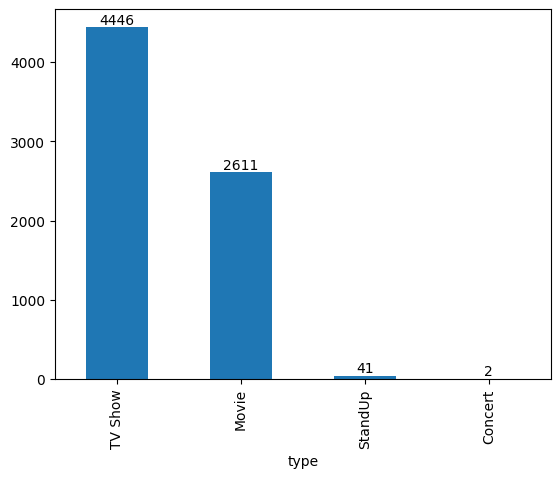

In [1374]:
ax = df_netflix_filled.type.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [1375]:
df_netflix_filled.year_rank.unique()

array(['1', '2', '3', '4', '5', '6', '10', '7', '8', '9', '-'],
      dtype=object)

[Text(0, 0, '859'),
 Text(0, 0, '708'),
 Text(0, 0, '708'),
 Text(0, 0, '706'),
 Text(0, 0, '705'),
 Text(0, 0, '699'),
 Text(0, 0, '675'),
 Text(0, 0, '633'),
 Text(0, 0, '554'),
 Text(0, 0, '481'),
 Text(0, 0, '372')]

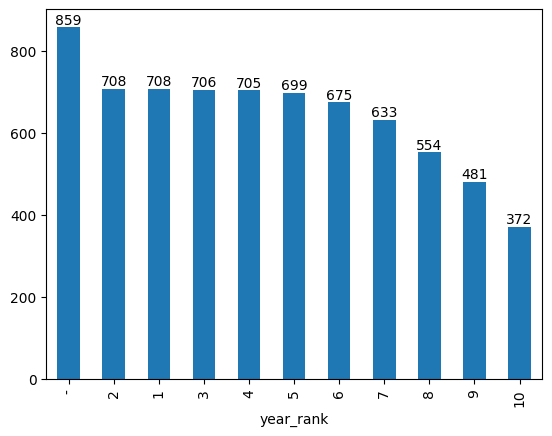

In [1376]:
ax = df_netflix_filled.year_rank.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [1377]:
df_netflix_filled.week_rank.unique()

array(['1', '-', '2', '4', '5', '3', '8', '9', '6', '7', '10'],
      dtype=object)

[Text(0, 0, '3968'),
 Text(0, 0, '653'),
 Text(0, 0, '564'),
 Text(0, 0, '452'),
 Text(0, 0, '336'),
 Text(0, 0, '282'),
 Text(0, 0, '240'),
 Text(0, 0, '193'),
 Text(0, 0, '167'),
 Text(0, 0, '133'),
 Text(0, 0, '112')]

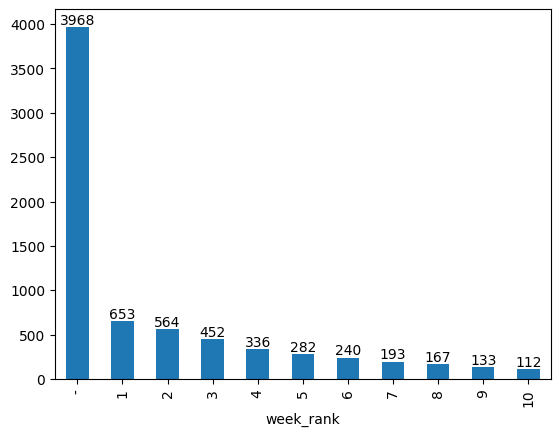

In [1378]:
ax = df_netflix_filled.week_rank.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [1379]:
df_netflix_filled.ranked.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

[Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710'),
 Text(0, 0, '710')]

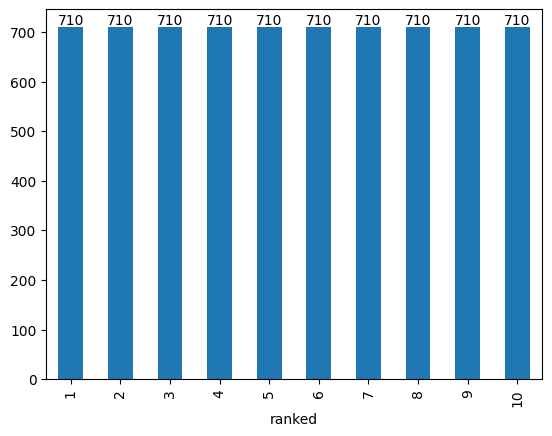

In [1380]:
ax = df_netflix_filled.ranked.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [1381]:
df_netflix_filled.exclusive.unique()

array(['Yes', 'No'], dtype=object)

[Text(0, 0, '4599'), Text(0, 0, '2501')]

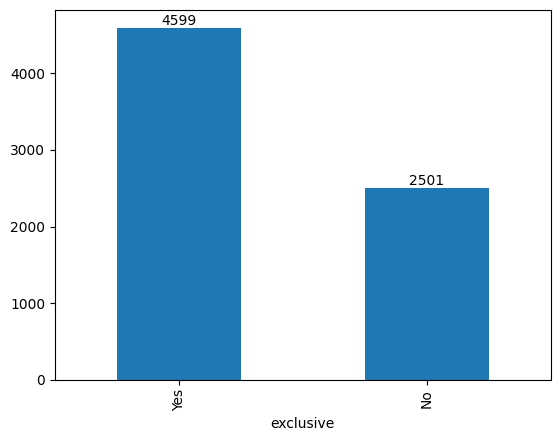

In [1382]:
ax = df_netflix_filled.exclusive.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

In [1383]:
df_netflix_filled.score.describe()

count   7100.000000000000000
mean     122.790140845070425
std      213.861642160496018
min        1.000000000000000
25%       19.000000000000000
50%       50.000000000000000
75%      128.000000000000000
max     1474.000000000000000
Name: score, dtype: float64

In [1384]:
# Coeficiênte de variação
df_netflix_filled.score.std() / df_netflix.score.mean() * 100

np.float64(174.16841506056616)

[Text(0, 0, '5559'),
 Text(0, 0, '856'),
 Text(0, 0, '301'),
 Text(0, 0, '137'),
 Text(0, 0, '40'),
 Text(0, 0, '28'),
 Text(0, 0, '42'),
 Text(0, 0, '36'),
 Text(0, 0, '50'),
 Text(0, 0, '51')]

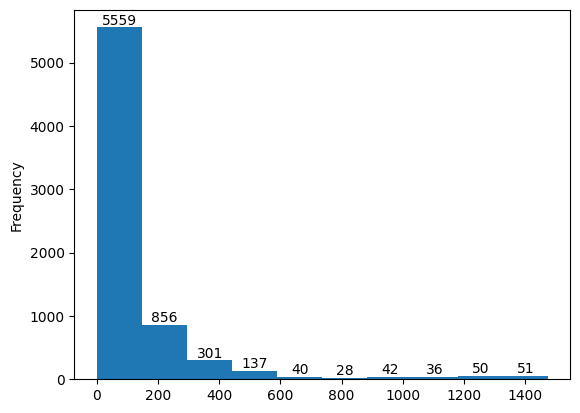

In [1385]:
ax = df_netflix_filled.score.plot.hist()
ax.bar_label(ax.containers[0])

In [1386]:
df_netflix_filled.days_top_10.describe()

count   7100.000000000000000
mean      24.123661971830987
std       58.473789251347533
min        1.000000000000000
25%        3.000000000000000
50%        7.000000000000000
75%       18.000000000000000
max      428.000000000000000
Name: days_top_10, dtype: float64

In [1387]:
df_netflix_filled.days_top_10.std() / df_netflix.days_top_10.mean() * 100

np.float64(242.39184465288446)

[Text(0, 0, '6422'),
 Text(0, 0, '333'),
 Text(0, 0, '46'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '43'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '43'),
 Text(0, 0, '43')]

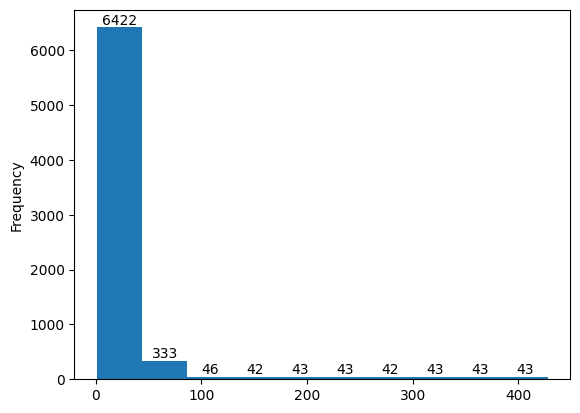

In [1388]:
ax = df_netflix_filled.days_top_10.plot.hist()
ax.bar_label(ax.containers[0])

In [1389]:
df_netflix_filled.as_of.describe()

count                             7100
mean     2021-03-21 12:00:00.000000256
min                2020-04-01 00:00:00
25%                2020-09-25 00:00:00
50%                2021-03-21 12:00:00
75%                2021-09-15 00:00:00
max                2022-03-11 00:00:00
Name: as_of, dtype: object

In [1390]:
df_netflix_filled.release_date.describe()

count                             7100
mean     2020-06-21 08:05:32.619718144
min                2007-01-15 00:00:00
25%                2020-04-26 00:00:00
50%                2020-10-02 00:00:00
75%                2021-05-14 00:00:00
max                2022-03-04 00:00:00
Name: release_date, dtype: object

In [1391]:
df_netflix.type.mode()

0    TV Show
Name: type, dtype: object

In [1392]:
len(df_netflix[df_netflix_filled.type == 'TV Show']) / len(df_netflix) * 100

62.61971830985915

In [1393]:
df_netflix.groupby('type')['type'].count().sort_values(ascending=False)

type
TV Show    4446
Movie      2611
StandUp      41
Concert       2
Name: type, dtype: int64

[Text(0, 0, '2'), Text(0, 0, '41'), Text(0, 0, '2611'), Text(0, 0, '4446')]

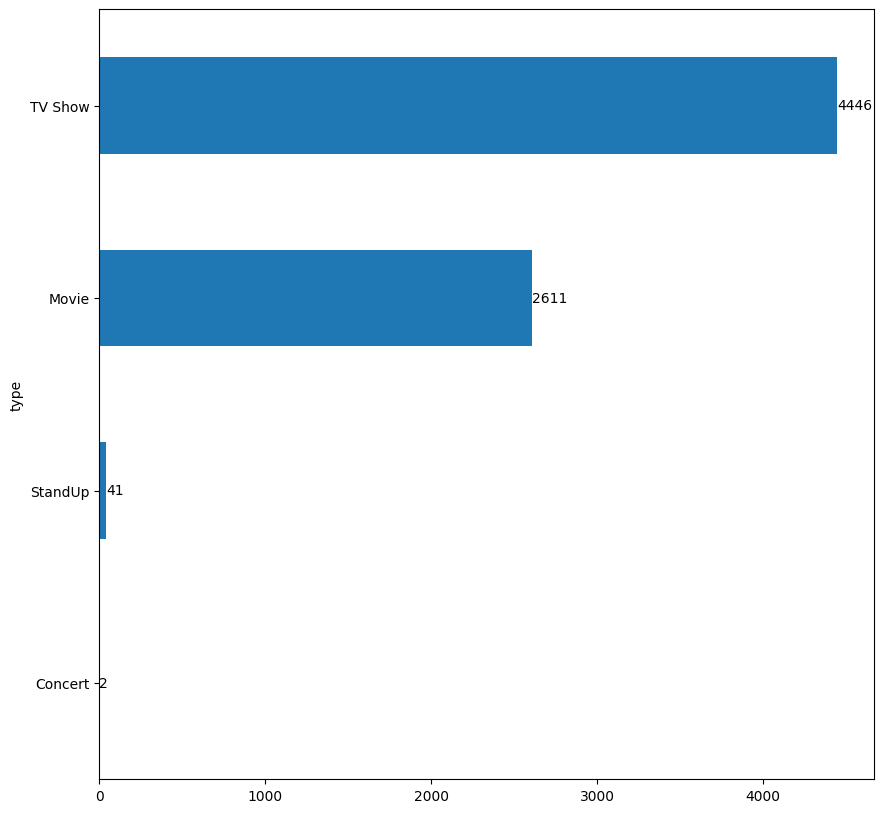

In [1394]:
ax = df_netflix.groupby('type')['type'].count().sort_values().plot.barh(figsize=[10,10])
ax.bar_label(ax.containers[0])

In [1395]:
len(df_netflix[df_netflix.type == 'Movie']) / len(df_netflix) * 100

36.774647887323944

In [1396]:
len(df_netflix[(df_netflix.type == 'Movie') | (df_netflix.type == 'TV Show')]) / len(df_netflix) * 100

99.3943661971831

> 99.3% da base de dados são de shows de tv e filmes, somente 0.7% são StandUp ou Concert.

In [1397]:
df_netflix_tvshow_movie = df_netflix[(df_netflix.type == 'Movie') | (df_netflix.type == 'TV Show')]
len(df_netflix_tvshow_movie)

7057

In [1398]:
df_netflix_standup_concert = df_netflix[(df_netflix.type != 'Movie') & (df_netflix.type != 'TV Show')]
len(df_netflix_standup_concert)

43

In [1399]:
df_netflix_tvshow = df_netflix[df_netflix.type == 'TV Show']
len(df_netflix_tvshow)

4446

In [1400]:
df_netflix_tvshow.exclusive.isna().sum() / len(df_netflix_tvshow) * 100

np.float64(30.5668016194332)

In [1401]:
df_netflix_movie = df_netflix[df_netflix.type == 'Movie']
len(df_netflix_movie)

2611

In [1402]:
df_netflix_movie.exclusive.isna().sum() / len(df_netflix_movie) * 100

np.float64(43.73803140559173)

### Relação (exclusive X type)

In [1403]:
pd.crosstab(df_netflix_filled.exclusive, df_netflix_filled.type)

type,Concert,Movie,StandUp,TV Show
exclusive,,,,
No,0,1142,0,1359
Yes,2,1469,41,3087


In [1404]:
pd.crosstab(df_netflix_filled.exclusive, df_netflix_filled.type, margins=True, margins_name='Total', normalize=True)

type,Concert,Movie,StandUp,TV Show,Total
exclusive,,,,,
No,0.000000000000000,0.160845070422535,0.000000000000000,0.191408450704225,0.352253521126761
Yes,0.000281690140845,0.206901408450704,0.005774647887324,0.434788732394366,0.647746478873239
Total,0.000281690140845,0.367746478873239,0.005774647887324,0.626197183098592,1.000000000000000


In [1405]:
pd.crosstab(df_netflix_filled.exclusive, df_netflix_filled.type, margins=True, margins_name='Total', normalize='index')

type,Concert,Movie,StandUp,TV Show
exclusive,,,,
No,0.000000000000000,0.456617353058776,0.000000000000000,0.543382646941224
Yes,0.000434877147206,0.319417264622744,0.008914981517721,0.671232876712329
Total,0.000281690140845,0.367746478873239,0.005774647887324,0.626197183098592


In [1406]:
pd.crosstab(df_netflix_lin_rem.exclusive, df_netflix_lin_rem.type)

type,Concert,Movie,StandUp,TV Show
exclusive,,,,
Yes,2,1469,41,3087


In [1407]:
pd.crosstab(df_netflix_lin_rem.exclusive, df_netflix_lin_rem.type, margins=True, margins_name='Total')

type,Concert,Movie,StandUp,TV Show,Total
exclusive,,,,,
Yes,2,1469,41,3087,4599
Total,2,1469,41,3087,4599


In [1408]:
pd.crosstab(df_netflix_lin_rem.exclusive, df_netflix_lin_rem.type, margins=True, margins_name='Total', normalize='index')

type,Concert,Movie,StandUp,TV Show
exclusive,,,,
Yes,0.000434877147206,0.319417264622744,0.008914981517721,0.671232876712329
Total,0.000434877147206,0.319417264622744,0.008914981517721,0.671232876712329


### Relação (type X rank)

In [1409]:
pd.crosstab(df_netflix.type, df_netflix.ranked, margins=True, margins_name='Total')

ranked,1,2,3,4,5,6,7,8,9,10,Total
type,,,,,,,,,,,
Concert,0,1,0,0,1,0,0,0,0,0,2
Movie,216,230,270,271,283,266,271,270,265,269,2611
StandUp,0,4,10,7,3,2,2,5,4,4,41
TV Show,494,475,430,432,423,442,437,435,441,437,4446
Total,710,710,710,710,710,710,710,710,710,710,7100


In [1410]:
pd.crosstab(df_netflix.type, df_netflix.ranked, margins=True, margins_name='Total', normalize='index')

ranked,1,2,3,4,5,6,7,8,9,10
type,,,,,,,,,,
Concert,0.000000000000000,0.500000000000000,0.000000000000000,0.000000000000000,0.500000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
Movie,0.082726924549981,0.088088854844887,0.103408655687476,0.103791650708541,0.108387590961318,0.101876675603217,0.103791650708541,0.103408655687476,0.101493680582152,0.103025660666411
StandUp,0.000000000000000,0.097560975609756,0.243902439024390,0.170731707317073,0.073170731707317,0.048780487804878,0.048780487804878,0.121951219512195,0.097560975609756,0.097560975609756
TV Show,0.111111111111111,0.106837606837607,0.096716149347728,0.097165991902834,0.095141700404858,0.099415204678363,0.098290598290598,0.097840755735493,0.099190283400810,0.098290598290598
Total,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000


### Relação (type X year_rank)

In [1411]:
pd.crosstab(df_netflix.type, df_netflix.year_rank, margins=True, margins_name='Total')

year_rank,-,1,10,2,3,4,5,6,7,8,9,Total
type,,,,,,,,,,,,
Concert,1,0,0,1,0,0,0,0,0,0,0,2
Movie,405,216,121,230,268,268,278,243,225,195,162,2611
StandUp,8,0,1,4,10,7,3,2,2,3,1,41
TV Show,445,492,250,473,428,430,418,430,406,356,318,4446
Total,859,708,372,708,706,705,699,675,633,554,481,7100


In [1412]:
pd.crosstab(df_netflix.type, df_netflix.year_rank, margins=True, margins_name='Total', normalize='index')

year_rank,-,1,10,2,3,4,5,6,7,8,9
type,,,,,,,,,,,
Concert,0.500000000000000,0.000000000000000,0.000000000000000,0.500000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
Movie,0.155112983531214,0.082726924549981,0.046342397548832,0.088088854844887,0.102642665645347,0.102642665645347,0.106472615855994,0.093067790118728,0.086173879739563,0.074684029107622,0.062045193412486
StandUp,0.195121951219512,0.000000000000000,0.024390243902439,0.097560975609756,0.243902439024390,0.170731707317073,0.073170731707317,0.048780487804878,0.048780487804878,0.073170731707317,0.024390243902439
TV Show,0.100089968511021,0.110661268556005,0.056230319388214,0.106387764282501,0.096266306792623,0.096716149347728,0.094017094017094,0.096716149347728,0.091318038686460,0.080071974808817,0.071524966261808
Total,0.120985915492958,0.099718309859155,0.052394366197183,0.099718309859155,0.099436619718310,0.099295774647887,0.098450704225352,0.095070422535211,0.089154929577465,0.078028169014085,0.067746478873239


### Relação (type X week_rank)

In [1413]:
pd.crosstab(df_netflix.type, df_netflix.week_rank, margins=True, margins_name='Total')

week_rank,-,1,10,2,3,4,5,6,7,8,9,Total
type,,,,,,,,,,,,
Concert,2,0,0,0,0,0,0,0,0,0,0,2
Movie,1942,164,21,124,97,72,59,46,38,21,27,2611
StandUp,29,0,0,2,5,4,1,0,0,0,0,41
TV Show,1995,489,91,438,350,260,222,194,155,146,106,4446
Total,3968,653,112,564,452,336,282,240,193,167,133,7100


In [1414]:
pd.crosstab(df_netflix.type, df_netflix.week_rank, margins=True, margins_name='Total', normalize='index')

week_rank,-,1,10,2,3,4,5,6,7,8,9
type,,,,,,,,,,,
Concert,1.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
Movie,0.743776330907698,0.062811183454615,0.008042895442359,0.047491382612026,0.037150517043278,0.027575641516660,0.022596706242819,0.017617770968977,0.014553810800460,0.008042895442359,0.010340865568748
StandUp,0.707317073170732,0.000000000000000,0.000000000000000,0.048780487804878,0.121951219512195,0.097560975609756,0.024390243902439,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000
TV Show,0.448717948717949,0.109986504723347,0.020467836257310,0.098515519568151,0.078722447143500,0.058479532163743,0.049932523616734,0.043634727845254,0.034862798020693,0.032838506522717,0.023841655420603
Total,0.558873239436620,0.091971830985915,0.015774647887324,0.079436619718310,0.063661971830986,0.047323943661972,0.039718309859155,0.033802816901408,0.027183098591549,0.023521126760563,0.018732394366197


### Relação (exclusive X rank)

In [1415]:
pd.crosstab(df_netflix_filled.exclusive, df_netflix_filled.ranked, margins=True, margins_name='Total')

ranked,1,2,3,4,5,6,7,8,9,10,Total
exclusive,,,,,,,,,,,
No,119,135,184,216,238,292,308,342,332,335,2501
Yes,591,575,526,494,472,418,402,368,378,375,4599
Total,710,710,710,710,710,710,710,710,710,710,7100


In [1416]:
pd.crosstab(df_netflix_filled.exclusive, df_netflix_filled.ranked, margins=True, margins_name='Total', normalize='index')

ranked,1,2,3,4,5,6,7,8,9,10
exclusive,,,,,,,,,,
No,0.047580967612955,0.053978408636545,0.073570571771291,0.086365453818473,0.095161935225910,0.116753298680528,0.123150739704118,0.136745301879248,0.132746901239504,0.133946421431427
Yes,0.128506196999348,0.125027179821700,0.114372689715155,0.107414655359861,0.102631006740596,0.090889323766036,0.087410306588389,0.080017395085888,0.082191780821918,0.081539465101109
Total,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000,0.100000000000000


### Teste Chi2 (exclusive X type)

Utilizando o DataFrame que substituiu os valores ausentes, 'exclusive', p/ o valor padrão 'No'.

In [1417]:
from scipy.stats import chi2_contingency

In [1418]:
# Chi-Square
df_crosstab_exclusive = pd.crosstab(df_netflix_filled.exclusive, df_netflix_filled.type)

In [1419]:
chi_netflix_exclusive = chi2_contingency(df_crosstab_exclusive)
chi_netflix_exclusive

Chi2ContingencyResult(statistic=np.float64(148.59513081815038), pvalue=np.float64(5.294359140867615e-32), dof=3, expected_freq=array([[7.04507042e-01, 9.19733944e+02, 1.44423944e+01, 1.56611915e+03],
       [1.29549296e+00, 1.69126606e+03, 2.65576056e+01, 2.87988085e+03]]))

In [1420]:
pd.set_option('display.float_format', lambda x: "{:.15f}".format(x))
scores_exclusive = pd.Series(chi_netflix_exclusive[0])
pvalues_exclusive = pd.Series(chi_netflix_exclusive[1])
df_chi_exclusive = pd.DataFrame({'Chi2': scores_exclusive, 'pvalues': pvalues_exclusive})
df_chi_exclusive

,Chi2,pvalues
0,148.595130818150380,0.000000000000000


**Conclusão**: Adotando valores 'No' p/ valores ausentes em 'exclusive', temos o P-Value < 0.05, podemos afirmar há uma forte relação entre exclusivo netflix e o tipo de conteúdo.

In [1421]:
def chi_report(x, y):
    df_crosstab = pd.crosstab(x, y)
    chi = chi2_contingency(df_crosstab)
    scores = pd.Series(chi[0])
    pvalues = pd.Series(chi[1])
    df_chi = pd.DataFrame({'Chi2': scores, 'pvalues': pvalues})
    return df_chi

### Teste Chi2 (exclusive X type)

Utilizando o DataFrame que removeu as linhas dos valores ausentes, 'exclusive'.

In [1422]:
chi_report(df_netflix_lin_rem.exclusive, df_netflix_lin_rem.type)

,Chi2,pvalues
0,0.000000000000000,1.000000000000000


**Conclusão**: Adotando a remoção das linhas c/ valores ausentes, temos o P-Value >= 0.05, podemos afirmar que não há relação entre exclusivo netflix o o tipo de conteúdo.

### Teste Chi2 (type X rank)

Considerando todos os dados, com valores ausentes.

In [1423]:
chi_report(df_netflix.type, df_netflix.ranked)

,Chi2,pvalues
0,50.335726191828229,0.004161254068443


**Conclusão**: P-Value < 0.05, podemos afirmar uma forte relação entre o tipo de conteúdo e o rank geral do conteúdo.

In [1424]:
chi_report(df_netflix.type, df_netflix.year_rank)

,Chi2,pvalues
0,97.631208864361469,0.000000004377381


**Conclusão**: P-Value < 0.05, podemos afirmar uma forte relação entre o tipo de conteúdo e o rank anual do conteúdo, mais forte que em relação ao rank geral.

In [1425]:
chi_report(df_netflix.type, df_netflix.week_rank)

,Chi2,pvalues
0,608.809253992144022,0.000000000000000


**Conclusão**: P-Value < 0.05, podemos afirmar uma forte relação entre o tipo de conteúdo e o rank mensal do conteúdo, mais forte que em relação ao rank anual e mais forte ainda que o rank geral.

### Teste Chi2 (type X rank)

Utilizando a população que substituiu os valores ausentes por 'No', em 'exclusive'.

In [1426]:
chi_report(df_netflix_filled.type, df_netflix_filled.rank)

,Chi2,pvalues
0,0.000000000000000,1.000000000000000


In [1427]:
chi_report(df_netflix_filled.type, df_netflix_filled.year_rank)

,Chi2,pvalues
0,97.631208864361469,0.000000004377381


In [1428]:
chi_report(df_netflix_filled.type, df_netflix_filled.week_rank)

,Chi2,pvalues
0,608.809253992144022,0.000000000000000


### Test Chi2 (type X rank)

Considerando a população que removeu as linhas com valores ausentes e que removeu a coluna exclusive.

In [1429]:
chi_report(df_netflix_lin_rem.type, df_netflix_lin_rem.rank), \
chi_report(df_netflix_lin_rem.type, df_netflix_lin_rem.year_rank), \
chi_report(df_netflix_lin_rem.type, df_netflix_lin_rem.week_rank)

(               Chi2           pvalues
 0 0.000000000000000 1.000000000000000,
                 Chi2           pvalues
 0 62.580856698515383 0.000443426334728,
                  Chi2           pvalues
 0 198.860093673346171 0.000000000000000)

In [1430]:
chi_report(df_netflix_col_rem.type, df_netflix_col_rem.rank), \
chi_report(df_netflix_col_rem.type, df_netflix_col_rem.year_rank), \
chi_report(df_netflix_col_rem.type, df_netflix_col_rem.week_rank)

(               Chi2           pvalues
 0 0.000000000000000 1.000000000000000,
                 Chi2           pvalues
 0 97.631208864361469 0.000000004377381,
                  Chi2           pvalues
 0 608.809253992144022 0.000000000000000)

**Conclusão**: Podemos ver que a influência dos valores ausentes somente foi identificada na população que removeu a coluna 'exclusive'. Mas nenhuma influência que altere a relação entre tipo de conteúdo e seu rank.

### Relação (days_top_10 X score)

In [1431]:
df_netflix.days_top_10.corr(df_netflix.score)

np.float64(0.9624135870948406)

In [1432]:
df_netflix.days_top_10.corr(df_netflix.score, method='spearman')

np.float64(0.9564224154143054)

In [1433]:
df_netflix.days_top_10.corr(df_netflix.score, method='kendall')

np.float64(0.8447874425058308)

<Axes: xlabel='days_top_10', ylabel='score'>

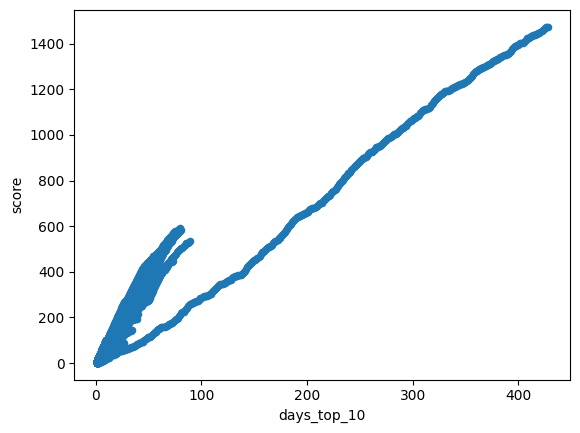

In [1434]:
df_netflix.plot.scatter(x="days_top_10", y="score")

### Relação (rank X score)

In [1435]:
df_netflix.ranked.corr(df_netflix.score)

np.float64(0.09776897062650593)

### Outlier (score)

<Axes: >

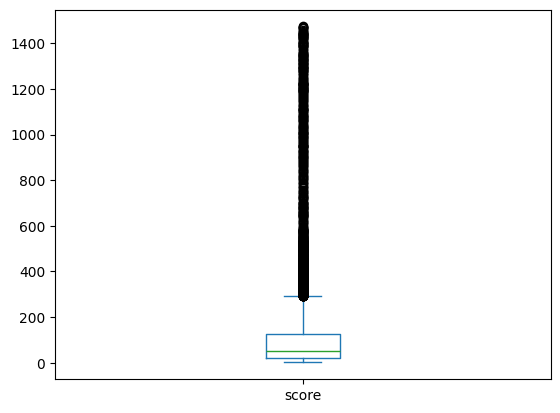

In [1436]:
df_netflix.score.plot.box()

<Axes: >

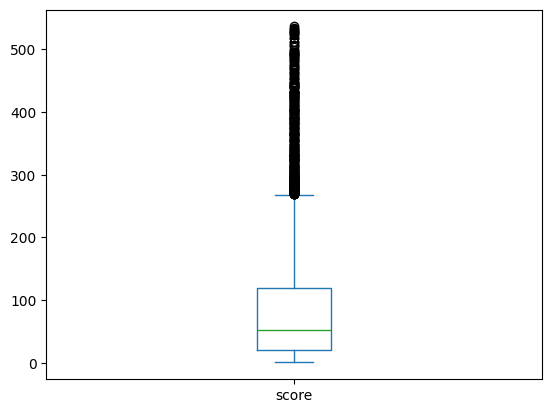

In [1437]:
df_netflix_lin_rem.score.plot.box()

score    Axes(0.125,0.11;0.775x0.77)
dtype: object

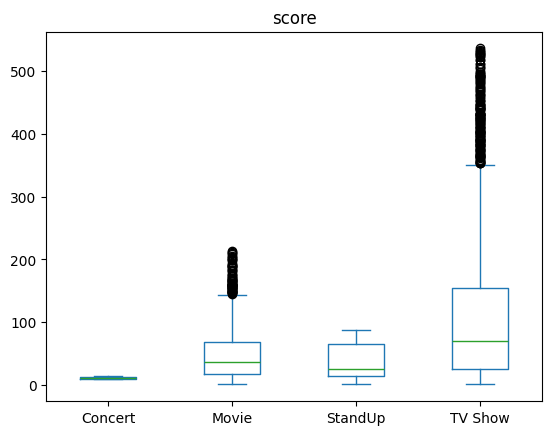

In [1438]:
df_netflix_lin_rem.plot.box(column=['score'], by=['type'])

<Axes: >

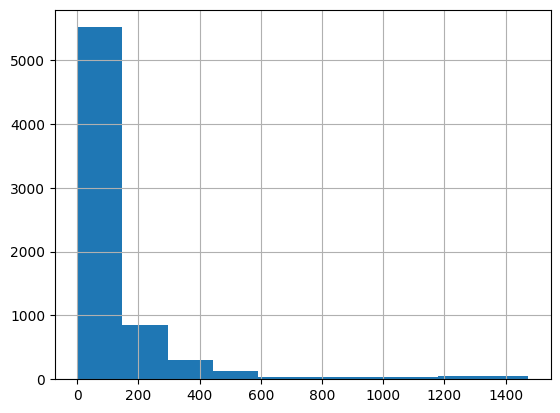

In [1439]:
df_netflix_tvshow_movie.score.hist()

In [1440]:
def iqr(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3 - q1
    lim_inf = q1 - (iqr * 1.5)
    lim_sup = q3 + (iqr * 1.5)
    return df[(df[var] < lim_inf) | (df[var] > lim_sup)]

In [1441]:
iqr(df_netflix_tvshow_movie, 'score')

,as_of,ranked,year_rank,week_rank,title,type,exclusive,release_date,days_top_10,score
247,2020-04-25,8,7,2,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,33,295
255,2020-04-26,6,8,3,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,34,300
269,2020-04-27,10,6,4,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,35,301
2382,2020-11-25,3,2,3,The Queenâs Gambit,TV Show,Yes,2020-10-23,33,296
2393,2020-11-26,4,3,3,The Queenâs Gambit,TV Show,Yes,2020-10-23,34,303
...,...,...,...,...,...,...,...,...,...,...
7008,2022-03-02,9,6,3,Sweet Magnolias,TV Show,Yes,2020-05-19,45,344
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,2020-02-13,43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,2020-02-13,44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,2020-02-13,45,306


**Obs**: Como não se mostrou uma distribuição normal, temos 688 registros atípicos p/ 'score' utilizando método Turkey (IQR)

**Conclusão**: Podemos ver valores (outlier) p/ variável 'score', na população que removeu as linhas c/ valores ausentes, tivemos menos incidência de valores atípicos (outlier).

> Temos uma assimetria positiva, extremidade da esquerda tem maior concentração de dados.

score    Axes(0.125,0.11;0.775x0.77)
dtype: object

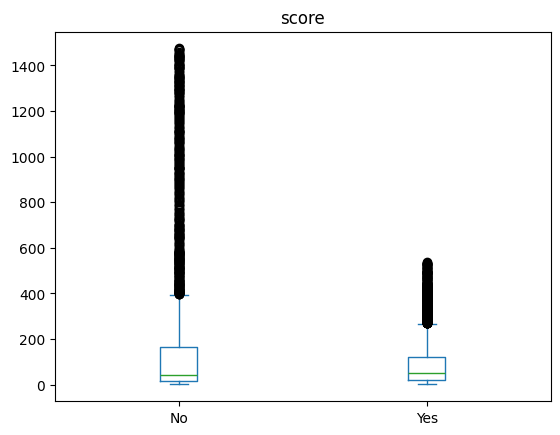

In [1442]:
df_netflix_filled.plot.box(column=['score'], by=['exclusive'])

### Outlier (days_top_10)

d:\workspace\rocketseat\desenvolvendo-ai\ia-challenge-eda\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<Axes: >

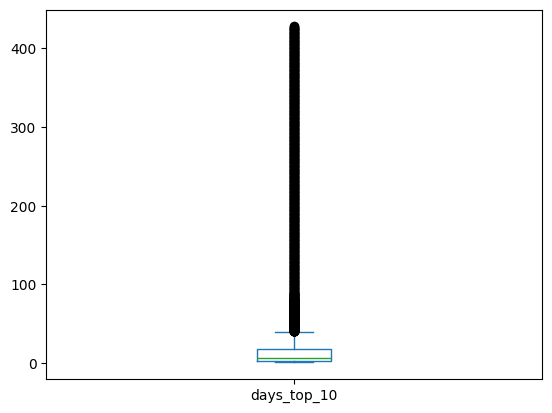

In [1443]:
df_netflix.days_top_10.plot.box()

<Axes: >

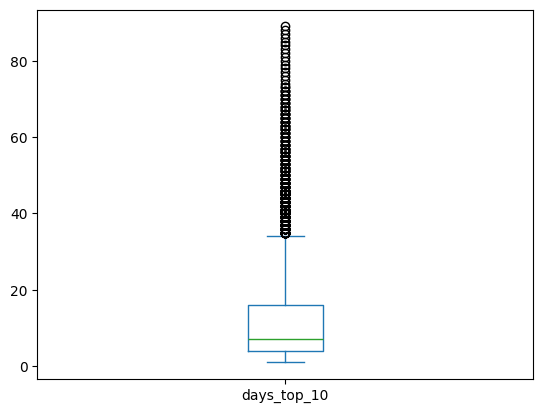

In [1444]:
df_netflix_lin_rem.days_top_10.plot.box()

days_top_10    Axes(0.125,0.11;0.775x0.77)
dtype: object

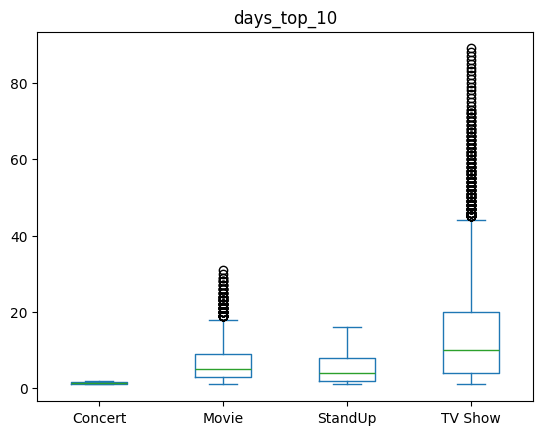

In [1445]:
df_netflix_lin_rem.plot.box(column=['days_top_10'], by=['type'])

<Axes: >

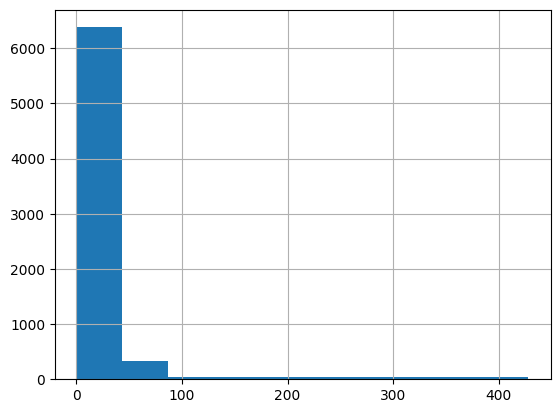

In [1446]:
df_netflix_tvshow_movie.days_top_10.hist()

In [1447]:
iqr(df_netflix_tvshow_movie, 'days_top_10')

,as_of,ranked,year_rank,week_rank,title,type,exclusive,release_date,days_top_10,score
438,2020-05-14,9,9,-,Ozark,TV Show,Yes,2017-07-21,41,256
447,2020-05-15,8,9,10,Ozark,TV Show,Yes,2017-07-21,42,259
458,2020-05-16,9,8,-,Ozark,TV Show,Yes,2017-07-21,43,261
489,2020-05-19,10,-,7,Ozark,TV Show,Yes,2017-07-21,44,262
629,2020-06-02,10,-,-,Outer Banks,TV Show,Yes,2020-04-15,41,291
...,...,...,...,...,...,...,...,...,...,...
7053,2022-03-07,4,3,4,Love is Blind,TV Show,Yes,2020-02-13,42,288
7063,2022-03-08,4,4,4,Love is Blind,TV Show,Yes,2020-02-13,43,295
7074,2022-03-09,5,4,5,Love is Blind,TV Show,Yes,2020-02-13,44,301
7085,2022-03-10,6,5,5,Love is Blind,TV Show,Yes,2020-02-13,45,306


**Obs**: Como não observamos uma distribuição normal, temos 743 registros atípicos utilizando o método Turkey(IQR).

**Conclusão**: Podemos ver valores (outlier) p/ variável 'days_top_10', na população que removeu as linhas c/ valores ausentes, tivemos menos incidência de valores atípicos (outlier).

> Temos uma assimetria positiva, extremidade da direita temos uma calda.

days_top_10    Axes(0.125,0.11;0.775x0.77)
dtype: object

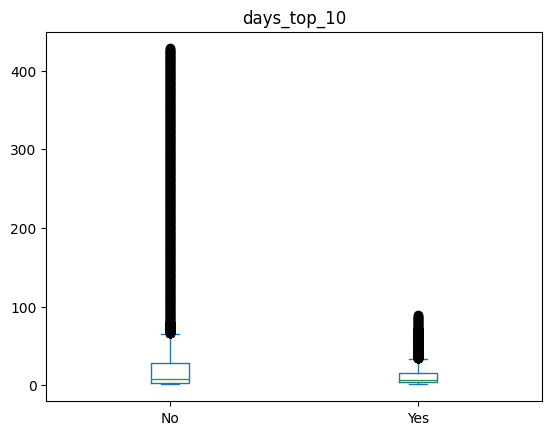

In [1448]:
df_netflix_filled.plot.box(column=['days_top_10'], by=['exclusive'])

### Outlier (ranked)

<Axes: >

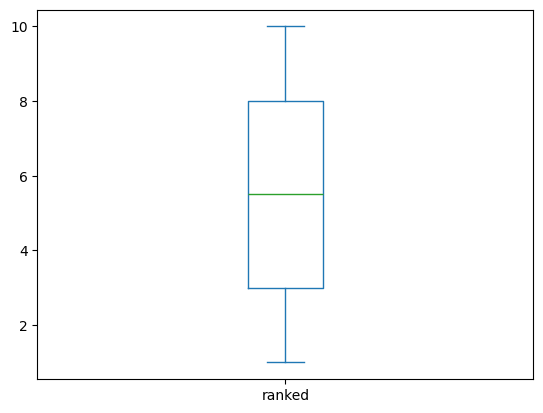

In [1449]:
df_netflix.ranked.plot.box()

<Axes: >

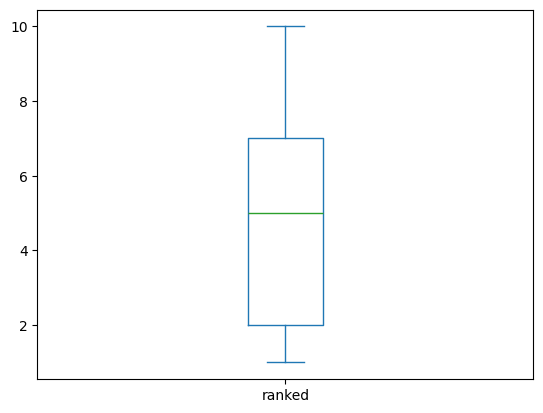

In [1450]:
df_netflix_lin_rem.ranked.plot.box()

ranked    Axes(0.125,0.11;0.775x0.77)
dtype: object

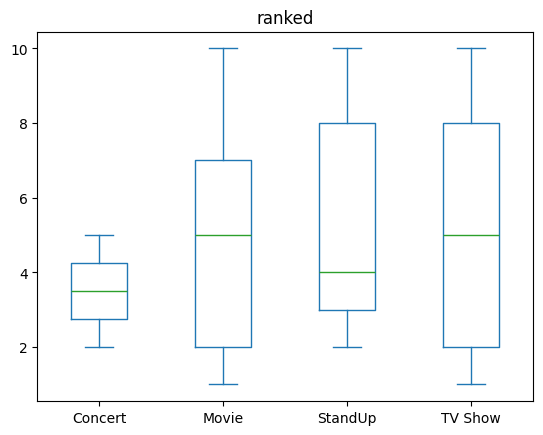

In [1451]:
df_netflix_lin_rem.plot.box(column=['ranked'], by='type')

ranked    Axes(0.125,0.11;0.775x0.77)
dtype: object

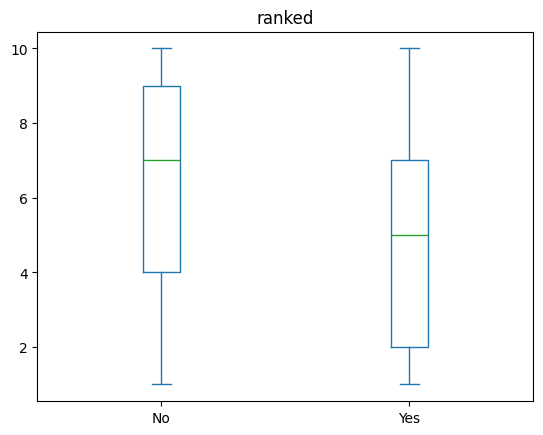

In [1452]:
df_netflix_filled.plot.box(column=['ranked'], by=['exclusive'])

ranked    Axes(0.125,0.11;0.775x0.77)
dtype: object

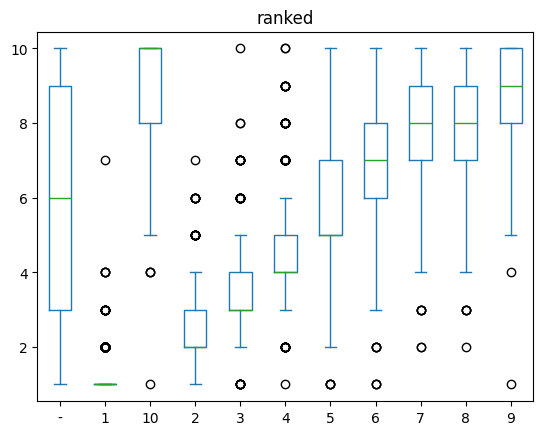

In [1453]:
df_netflix_lin_rem.plot.box(column=['ranked'], by=['year_rank'])

ranked    Axes(0.125,0.11;0.775x0.77)
dtype: object

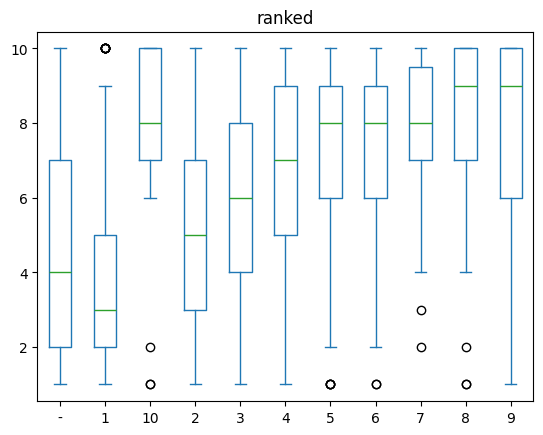

In [1454]:
df_netflix_lin_rem.plot.box(column=['ranked'], by=['week_rank'])

<Axes: ylabel='Frequency'>

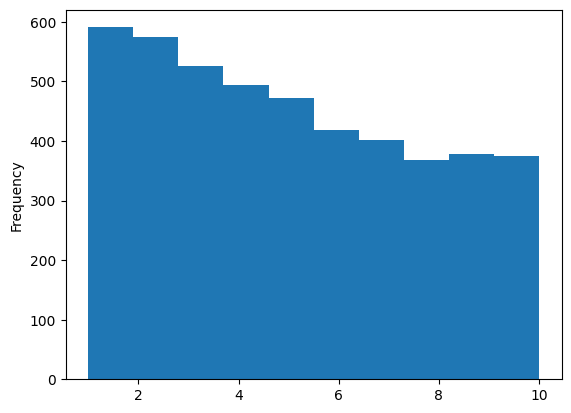

In [1455]:
df_netflix_lin_rem.ranked.plot.hist()

In [1456]:
df_aux = df_netflix_lin_rem[(df_netflix_lin_rem.year_rank.str.contains('1|2|3|4|5|6|7|8|9|10', regex=True))]
iqr(df_aux, 'ranked')

,as_of,ranked,year_rank,week_rank,title,type,exclusive,release_date,days_top_10,score


In [1457]:
df_aux = df_netflix_lin_rem[(df_netflix_lin_rem.week_rank.str.contains('1|5|6|7|8|10', regex=True))]
iqr(df_aux, 'ranked')

,as_of,ranked,year_rank,week_rank,title,type,exclusive,release_date,days_top_10,score


**Obs**: Como não é uma distribuição normal pelo método Turkey (IQR) não apresentou registros atípicos p/ 'ranked'. Foi utilizado os dados filtrados por 'year_rank' e 'week_rank', onde pelo gráfico de BoxPlot foi possível verificar valores fora dos limites.

**Conclusão**: Não temos outliers para os valores em 'ranked'.

In [1458]:
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '1')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '2')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '3')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '4')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '5')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '6')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '7')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '8')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '9')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.year_rank == '10')], 'ranked'))

(126, 21, 36, 64, 4, 7, 6, 5, 2, 4)

In [1459]:
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.week_rank == '1')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.week_rank == '5')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.week_rank == '6')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.week_rank == '7')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.week_rank == '8')], 'ranked')), \
len(iqr(df_netflix_lin_rem[(df_netflix_lin_rem.week_rank == '10')], 'ranked'))

(8, 4, 2, 2, 3, 3)

> Olhando separadamente podemos visualizar os registros atípicos para cada 'year_rank' ou 'week_rank'.